In [2]:
'''
We find the parameters of the two rotations that amplitude encode a four dimensional vector onto two qubits 
'''

import numpy as np 
import math

def FindTwoParameters(classicalArray: np.array) -> np.array:
    '''
    Given a classical array, this function returns two parameters parametrizing two rotations in a circuit
    '''

    # normalize vector 
    classicalArray = classicalArray / np.linalg.norm(classicalArray)

    partOne = classicalArray[:2]
    partTwo = classicalArray[2:]

    # check if two parameters are equal 
    thetaV1 = 2 * math.acos(math.sqrt( np.linalg.norm(partOne) ))

    thetaV2 = 2 * math.asin(math.sqrt( np.linalg.norm(partTwo) ))

    print(thetaV1, thetaV2)

FindTwoParameters(np.array([1,2,3,4]))



1.7553455388820218 2.5423125025781075


normalized array:  [0.03333333 0.13333333 0.3        0.53333333]
2.300523983021863 1.8545904360032246 2.214297435588181
        ┌────────────┐              ┌───┐              ┌───┐ ░ ┌─┐   
   q_0: ┤ Ry(2.3005) ├──────■───────┤ X ├──────■───────┤ X ├─░─┤M├───
        └────────────┘┌─────┴──────┐└───┘┌─────┴──────┐└───┘ ░ └╥┘┌─┐
   q_1: ──────────────┤ Ry(1.8546) ├─────┤ Ry(2.2143) ├──────░──╫─┤M├
                      └────────────┘     └────────────┘      ░  ║ └╥┘
meas: 2/════════════════════════════════════════════════════════╩══╩═
                                                                0  1 


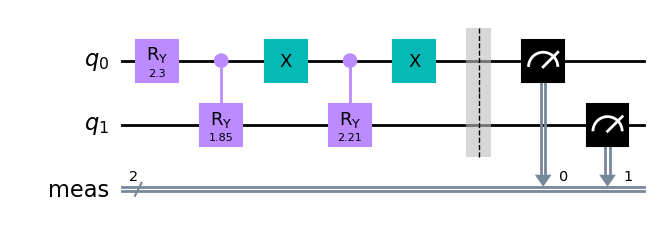

In [4]:
def noun_ansatz(classicalArray):

    # normalize vector 
    classicalArray = classicalArray / np.linalg.norm(classicalArray)

    print('normalized array: ', classicalArray**2)

    a1 = np.linalg.norm(classicalArray[0:2])
    a2 = np.linalg.norm(classicalArray[2:])
    phi1 = 2 * math.acos(a1)

    # fix issues with rotations
    rot1 = classicalArray[0:2]/a1
    phi2_cos = 2 * math.acos(rot1[0])
    phi2_sin = 2 * math.asin(rot1[1])
    if not np.sign(phi2_cos) == np.sign(phi2_sin):
        phi2_cos *= -1
    rot2 = classicalArray[2: ]/a2
    phi3_cos = 2 * math.acos(rot2[0])
    phi3_sin = 2 * math.asin(rot2[1])
    if not np.sign(phi3_cos) == np.sign(phi3_sin):
        phi3_cos *= -1

    return phi1, phi3_cos, phi2_cos



# test if the amplitude encoding works 
from qiskit import QuantumCircuit

theta1, theta2, theta3 = noun_ansatz(np.array([1,2,3,4]))

print(theta1, theta2, theta3)

qc = QuantumCircuit(2)

# qc.initialize('00')

qc.ry(theta1, 0)
qc.cry(theta2, 0, 1)
qc.x(0)
qc.cry(theta3, 0, 1)
qc.x(0)



qc.measure_all()

# qc = qc.decompose(reps = 1)

print(qc)

qc.draw(output='mpl')






In [5]:
from qiskit import Aer, execute


# Use the Aer simulator to execute the circuit
simulator = Aer.get_backend('qasm_simulator')
shots = 100000  # Number of times to run the circuit
job = execute(qc, simulator, shots=shots)  # Execute the circuit
result = job.result()
counts = result.get_counts(qc)



# Calculate the probability distribution
prob_dist = {state: counts[state] / shots for state in counts}

prob_dist



{'00': 0.03324, '10': 0.13328, '01': 0.29857, '11': 0.53491}

In [57]:
from qiskit import Aer

backend = Aer.get_backend('aer_simulator')

shots = 1024
counts = backend.run(qc,shots=shots).result().get_counts()

In [59]:
probs = {string:count/shots for string,count in counts.items()}

print(probs)

{'11': 0.0009765625, '01': 0.0087890625, '10': 0.017578125, '00': 0.97265625}


In [51]:
from qiskit.quantum_info import Statevector

stateVector = Statevector.from_label('1000')
stateVector.evolve(qc)

stateVector.probabilities()

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
test = QuantumCircuit(1)
# test.measure_all()

Statevector(test).probabilities()

array([1., 0.])